In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
X=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
X.drop(['car_ID'],axis=1,inplace=True)

In [ ]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
from sklearn.compose import ColumnTransformer
transformer1=ColumnTransformer(transformers=[
    ('minmaxscaled',MinMaxScaler(),['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']),
    ('ordinal scaled edu',OrdinalEncoder(),['CarName','carbody','drivewheel','enginetype','cylindernumber' ,'fuelsystem']),
    ('onehot scaled',OneHotEncoder(drop='first',sparse=False),['fueltype','aspiration','doornumber','enginelocation'])
  ])


model=LinearRegression()

In [ ]:
scaledX= transformer1.fit_transform(X)
scaledX

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1.        , 0.05830904, 0.41343284, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05830904, 0.41343284, ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 0.2303207 , 0.44925373, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.2       , 0.65597668, 0.7119403 , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.65597668, 0.7119403 , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
dfnew=pd.DataFrame(scaledX,columns=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','CarName','carbody','drivewheel','enginetype','cylindernumber' ,'fuelsystem','fueltype','aspiration','doornumber','enginelocation'])
scaledX=dfnew.copy()

In [ ]:
mms=MinMaxScaler()
scaled_price=mms.fit_transform(df[['price']])

In [ ]:
scaledX

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype,aspiration,doornumber,enginelocation
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,2.0,0.0,2.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,3.0,0.0,2.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,...,1.0,2.0,2.0,5.0,3.0,5.0,1.0,0.0,1.0,0.0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,...,4.0,3.0,1.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,...,5.0,3.0,0.0,3.0,1.0,5.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,...,139.0,3.0,2.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,...,138.0,3.0,2.0,3.0,2.0,5.0,1.0,1.0,0.0,0.0
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,...,140.0,3.0,2.0,5.0,3.0,5.0,1.0,0.0,0.0,0.0
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,...,142.0,3.0,2.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0


In [ ]:
scaled_price

array([[2.07958890e-01],
       [2.82557966e-01],
       [2.82557966e-01],
       [2.19254257e-01],
       [3.06141701e-01],
       [2.51526737e-01],
       [3.12596197e-01],
       [3.42634427e-01],
       [4.65642222e-01],
       [3.16299265e-01],
       [2.80820217e-01],
       [2.93108584e-01],
       [3.93525644e-01],
       [3.96877017e-01],
       [4.82771461e-01],
       [6.36562236e-01],
       [8.98589941e-01],
       [7.88491137e-01],
       [8.19224468e-04],
       [2.92190060e-02],
       [3.61700015e-02],
       [1.12705427e-02],
       [3.12546547e-02],
       [7.04781292e-02],
       [2.75805571e-02],
       [3.90745246e-02],
       [6.18390348e-02],
       [8.53979445e-02],
       [9.44094136e-02],
       [1.94776823e-01],
       [3.37868030e-02],
       [4.31209970e-02],
       [6.97582047e-03],
       [3.50280522e-02],
       [4.99230426e-02],
       [5.40439899e-02],
       [5.40439899e-02],
       [6.89389802e-02],
       [9.87289608e-02],
       [9.25227149e-02],


In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(scaledX,scaled_price,test_size=0.2,random_state=0)


In [ ]:
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.8113230018091918

In [ ]:
scaleddata=np.hstack((scaledX,scaled_price))

In [ ]:
from sklearn.decomposition import PCA  # dimentionality reduction
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(scaleddata)


In [ ]:
df_new=pd.DataFrame(x_reduced,columns=['col_1','col_2'])

In [ ]:
df_new

,col_1,col_2
0,75.197419,2.493395
1,74.197532,2.491863
2,76.204398,2.154854
3,73.195671,2.049671
4,72.196868,1.962218
...,...,...
200,-61.800856,1.471504
201,-60.800850,1.561389
202,-62.796643,1.382704
203,-64.790146,-0.464165


In [ ]:
a=df_new['col_1']
b=df_new['col_2']

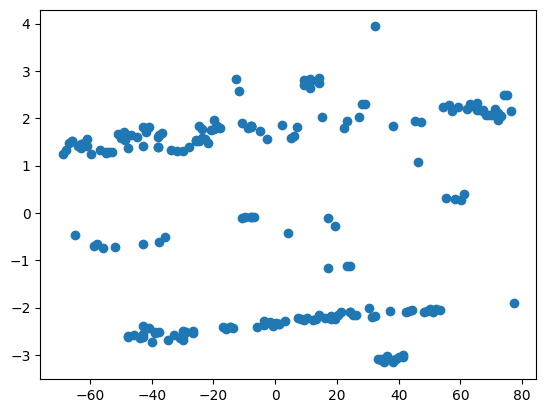

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(a,b)
